In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

## First, read in your dataframe

In [2]:
data = pd.read_csv('findings_data.csv')

In [3]:
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


### To understand distributions of variables as they relate to diseases, let's try splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease

In [4]:
np.unique(list(chain(*data['Finding Labels'].apply(lambda x: x.split('|')).tolist())))

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [5]:
all_labels = np.unique(list(chain(*data['Finding Labels'].apply(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
519,520,520,No Finding,39,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
398,399,399,No Finding,57,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
755,756,756,Cardiomegaly|Edema,58,F,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Now write your code here to visualize some of the distributions specified in the instructions

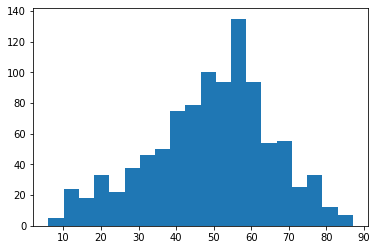

In [6]:
plt.hist(data['Patient Age'], bins=20);

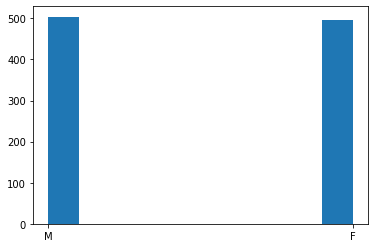

In [7]:
plt.hist(data['Patient Gender']);

### Finally, look at if and how age & gender relate to mass size in individuals who have a mass as a finding:

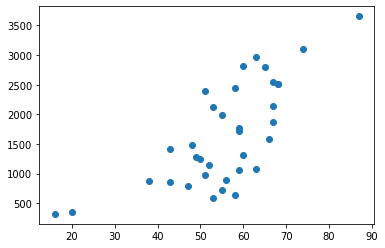

In [8]:
plt.scatter(data['Patient Age'],data['Mass_Size'])

In [9]:
## Use the following to see if there are significant correlations between the two: 
data = data.dropna()
scipy.stats.pearsonr(data['Patient Age'],data['Mass_Size'])

(0.7275663300043572, 7.354553889321959e-07)

In [10]:
mass_sizes_male = data[data['Patient Gender']=='M']['Mass_Size']
mass_sizes_female = data[data['Patient Gender']=='F']['Mass_Size']
scipy.stats.ttest_ind(mass_sizes_male, mass_sizes_female)

Ttest_indResult(statistic=0.6188395721019645, pvalue=0.5402707532656863)

In [30]:
def _color_red_or_green(val):
    if val >= 3:
        color = 'red'
    elif val in range(1,3):
        color = 'yellow'
    else:
        color='green'
    return 'color: %s' % color

x = data[all_labels].T.dot(data[all_labels])
x.style.applymap(_color_red_or_green)

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Atelectasis,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Cardiomegaly,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Consolidation,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Edema,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Effusion,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Emphysema,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fibrosis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Infiltration,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mass,3.000000,0.000000,4.000000,0.000000,4.000000,2.000000,0.000000,4.000000,35.000000,0.000000,4.000000,4.000000,1.000000,2.000000
No Finding,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']